<br><br><font color="gray">DOING COMPUTATIONAL SOCIAL SCIENCE<br>MODULE 11 <strong>PROBLEM SETS</strong></font>

# <font color="#49699E" size=40>SUPERVISED LEARNING AND NEURAL NETWORKS</font>
This module notebook assignment is organized into two parts. 

- **[PART A](#SECAEP) (Accompanying Chapter 21, "Supervised Learning with Regression and Distance-Based Models")**
    - [Exercises and Practice Problems](#SECAEP) (All students)
- **[PART B](#SECBEP) (Accompanying Chapter 22, "Supervised Learning with Tree-Based Models"**)
    - [Exercises and Practice Problems](#SECBEP) (All students)

# What You Need to Know Before Getting Started

- **You can consult any resources you want when completing these exercises and problems**. Just as it is in the "real world:" if you can't figure out how to do something, look it up. My recommendation is that you check the relevant parts of the assigned reading or search for inspiration on [https://stackoverflow.com](https://stackoverflow.com).
- **Each problem is worth 1 point**. All problems are equally weighted.
- **The information you need for each problem set is provided in the blue and green cells.** General instructions / the problem set preamble are in the blue cells, and instructions for specific problems are in the green cells. **You have to execute all of the code in the problem set, but you are only responsible for entering code into the code cells that immediately follow a green cell**. You will also recognize those cells because they will be incomplete. You need to replace each `____` with the code that will make the cell execute properly.
- **The comments in the problem cells contain clues indicating what the following line of code is supposed to do.** Use these comments as a guide when filling in the blanks. 
- **Each problem cell stores one object named according to the problem (e.g. _09)**. These are not important for you, but we use them to help grade your work efficiently, so **do not delete them or change their names**. If you do, you will lose marks.
- **You can ask for help**. If you run into problems, you can reach out to John (john.mclevey@uwaterloo.ca) or Pierson (pbrowne@uwaterloo.ca) for help. You can ask a friend for help if you like, regardless of whether they are enrolled in the course.

Finally, remember that you do not need to "master" this content before moving on to other course materials, as what is introduced here is reinforced throughout the rest of the course. You will have plenty of time to practice and cement your new knowledge and skills.

# How to Submit Your (Pickled) Assignment! 

Since we've had to rethink the way we deliver, collect, and evaluate these problem sets, we want to be very clear about what you need to do to properly submit this module notebook assignment. Please read the following explanation of our process so that you understand how this works, and what you need to do.

At the very end of this notebook, there is a code cell that will compile all of your answers to every problem in the assignment and save them as a 'pickle' file (`.pkl`) in the current working directory. You can execute that cell as many times as you like. Each time you run it, it will overwrite the old pickle with your updated answers. **Once you've ensured that everything in the notebook is complete and finished to your satisfaction, it's up to you to get the pickle that you just created and upload it to the appropriate Learn dropbox for this module.** The file you are looking for will not exist until you run the cells at the end of the notebook. Once it has been created, it will follow this naming convention: 

> `module_[number]__student_[your_student_number].pkl`

To be very clear, **you need to submit the pickle to Learn**. You do not need to upload the Jupyter Notebook as initially planned. **Just the pickle!**

## Make Sure Everything is Good to Go

It's generally a good idea to do a 'fresh' run of your entire notebook before you submit your assignment to make sure that everything is working as it should be. You can use the button with the 'Fast-Forward' arrows in the Jupyter toolbar above to restart the kernel (resetting everything to initial conditions) and running every code cell in the notebook, in order. You can also select 'Restart and Run All' from the Kernel dropdown menu. If the entire notebook runs without throwing any errors, you should be good to go!

If you're running into issues, make sure that you haven't changed any of the 'answer' variable names we provided you with (e.g., we asked you to store your answer to the first question in a variable called `_01`). If you change an answer's variable name or don't store your answer in that variable, the project won't finalize properly and you won't get proper credit for your work. The same goes for the `student_id` metadata variable we ask you to complete immediately below; if any of those are missing, haven't been filled in properly, or have been renamed, issues may arise during the grading process and you will not receive proper credit. So make sure you enter your student information, and don't delete or change the names of the variables that store your answers to each problem!

## IMPORTANT: ADD YOUR STUDENT ID NUMBER

<div class="alert alert-block alert-danger">
To evaluate your work, we need you to provide your student number. In the cell below, <strong>replace '12345678' with your student number</strong>. The student_id' variable needs to be an integer, so <strong>do not wrap it in quotes.</strong>
</div>

In [54]:
# Your UWaterloo student ID number
student_id = 20674880

## Package Imports

In [56]:
import pandas as pd 

import numpy as np
from numpy.random import seed

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from pprint import pprint

seed(42)



## Dataset Columns

In [58]:
x_columns = [

    # Religion and Morale
    'v54', # Religious services? - 1=More than Once Per Week, 7=Never
    'v149', # Do you justify: claiming state benefits? - 1=Never, 10=Always
    'v150', # Do you justify: cheating on tax? - 1=Never, 10=Always 
    'v151', # Do you justify: taking soft drugs? - 1=Never, 10=Always 
    'v152', # Do you justify: taking a bribe? - 1=Never, 10=Always 
    'v153', # Do you justify: homosexuality? - 1=Never, 10=Always 
    'v154', # Do you justify: abortion? - 1=Never, 10=Always 
    'v155', # Do you justify: divorce? - 1=Never, 10=Always 
    'v156', # Do you justify: euthanasia? - 1=Never, 10=Always 
    'v157', # Do you justify: suicide? - 1=Never, 10=Always 
    'v158', # Do you justify: having casual sex? - 1=Never, 10=Always 
    'v159', # Do you justify: public transit fare evasion? - 1=Never, 10=Always 
    'v160', # Do you justify: prostitution? - 1=Never, 10=Always 
    'v161', # Do you justify: artificial insemination? - 1=Never, 10=Always 
    'v162', # Do you justify: political violence? - 1=Never, 10=Always 
    'v163', # Do you justify: death penalty? - 1=Never, 10=Always 

    # Politics and Society
    'v97', # Interested in Politics? - 1=Interested, 4=Not Interested
    'v121', # How much confidence in Parliament? - 1=High, 4=Low
    'v126', # How much confidence in Health Care System? - 1=High, 4=Low
    'v142', # Importance of Democracy - 1=Unimportant, 10=Important
    'v143', # Democracy in own country - 1=Undemocratic, 10=Democratic
    'v145', # Political System: Strong Leader - 1=Good, 4=Bad

    # National Identity
    'v170', # How proud are you of being a citizen? - 1=Proud, 4=Not Proud
    'v184', # Immigrants: impact on development of country - 1=Bad, 5=Good
    'v185', # Immigrants: take away jobs from Nation - 1=Take, 10=Do Not Take
    'v198', # European Union Enlargement - 1=Should Go Further, 10=Too Far Already
]

y_columns = [
    # Overview
    'country',
    
    # Socio-demographics
    '', # Year of Birth by respondent 
    'v261_ppp', # Household Monthly Net Income, PPP-Corrected
]

# <font color="#49699E">PART A | CHAPTER 21</font>
<a id="SECAEP"></a>

## Question 1:
<div class="alert alert-block alert-info">  
For each of the parts in this assignment, we're going to closely mirror our progression through the various models in each of the corresponding chapters. It should come as no surprise, then, that we're going to start with some plain-old run-of-the-mill Ordinary Least Squares regression (approaching it from a Machine Learning perspective, of course). We'll start by seeing how effectively we can predict someone's year of birth using variables from the survey on the topics of Religion, Morality, Politics, Society, and National Identity.
</div>
<div class="alert alert-block alert-success">
Perform the following steps, in order:
<ol>
    <li> Load the EVS dataset (provided) 
    <li> Create a feature matrix containing all of the columns in <code>x_columns</code> and a vector containing the outcome variable, year of birth
    <li> Perform a shuffled train-test split of the feature matrix and outcome vector random state of 42
    <li> Create an instance of the <code>ShuffleSplit</code> class, with 5 splits, a test size of 0.2, and a random state of 42
    <li> Using the <code>ShuffleSplit</code> instance, perform cross-validated linear regression on your training data 
    <li> Report the mean score from your cross-validated linear regression
</ol>
</div>

In [60]:
#_01

# Load 'evs_module_11.csv'
df = pd.read_csv("/Users/Diwya/workspace/INTEG440/dcss_modules/MODULE11/data/evs_module_11.csv")

# Create a feature matrix using all of the column names in `x_columns`
X = df[x_columns] 

# Create the outcome variable
y = df['v226']


# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

# Create an instance of the shufflesplit class
shuffsplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Retreieve the scores from a cross-validated linear regression
olscv_score = cross_val_score(LinearRegression(), X_train, y_train, cv=shuffsplit)
print(olscv_score)
print(f"Mean: {olscv_score.mean()}")

# DO NOT ALTER ANYTHING BELOW THIS LINE 
_01 = round(olscv_score.mean(), 2) 

[0.15590317 0.16307872 0.15629859 0.15649739 0.15806234]
Mean: 0.15796804282590388


## Question 2:
<div class="alert alert-block alert-info">  
From the above results, it should be pretty clear that our OLS did <b>not</b> perform well. It's possible that this under-performance is as a result of overfitting. If so, we can use either ridge or lasso reguarlization to help dig our model out of its overfitting problem. It's also possible, however, that our model just isn't any good, and regularization won't be of much use. 
</div>
<div class="alert alert-block alert-success">
Using 10 different alpha settings ranging from 0.01 to 2, perform 10 cross-validated ridge and lasso regressions (10 each). When performing the cross-vaildations, use the same instance of the <code>ShuffleSplit</code> class from the previous question. Plot the resulting cross-validated R2 scores from the 10 ridge and 10 lasso models and compare them to the baseline R2 score from the unregularized OLS model. Examine the plot to determine if the model from Q1 is <b>significantly</b> overfitting the data. Submit your answer as a <b>BOOLEAN</b> value. If your answer is anything other than a boolean value, you will recieve no credit for this question. 
</div>

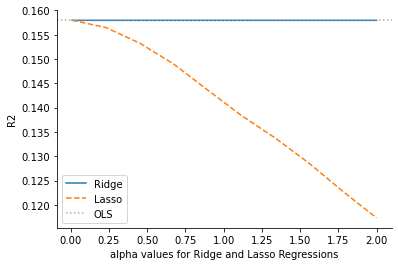

In [61]:
#_02

# Create array of alpha values 
alphas = np.linspace(0.01, 2, 10)

ridge_r2s = []
lasso_r2s = []

# Iterate over alpha values, run cross-validated ridge and lasso regressions for each alpha, and save *average* of scores
for alpha in alphas:
    new_ridge = Ridge(alpha)
    ridge_r2s.append(cross_val_score(new_ridge, X_train, y_train, cv=shuffsplit).mean())
    
    new_lasso = Lasso(alpha)
    lasso_r2s.append(cross_val_score(new_lasso,X_train, y_train, cv=shuffsplit).mean())

# Combine scores into dataframe for easy plotting
r2s = pd.DataFrame(
    zip(alphas, ridge_r2s, lasso_r2s), 
    columns = ["alpha", "ridge", "lasso"])

# Plot scores
fig, ax = plt.subplots()
sns.lineplot(x="alpha", y="ridge", data = r2s, label="Ridge", linestyle='solid')
sns.lineplot(x="alpha", y="lasso", data = r2s, label = "Lasso", linestyle='dashed')
ax.axhline(olscv_score.mean(), label="OLS", linestyle='dotted', color="darkgray")
ax.set(xlabel='alpha values for Ridge and Lasso Regressions', ylabel='R2')
sns.despine()
ax.legend()
plt.show()

# Submit a *BOOLEAN VALUE* indicating whether or not you think the Q1 model was overfitting.
is_q1_overfitting = False 

# DO NOT ALTER ANYTHING BELOW THIS LINE 
_02 = is_q1_overfitting

## Question 3:
<div class="alert alert-block alert-info">  
Regardless of how Question 2 turned out, it's pretty clear that a garden-variety OLS model isn't going to be the best choice for predicting the survey respondents' years of birth. Let's see if we can do better with a Logistic Regression instead. To accomplish this, we're going to categorize everyone in the dataset as either being born after (1) or before (0) 1970 (those born in 1970 also count as 'before'). 
</div>
<div class="alert alert-block alert-success">
Create a vector containing an outcome variable indicating whether or not each respondent was born after (1), before (0), or during (0) the year 1970. Using this new outcome vector and a remade feature matrix (again, using all of the columns from `x_columns`), create a shuffled train-test split and a ShuffleSplit with 5 splits and a test size of 0.2. Both the train-test split and ShuffleSplit should use a random state of 42. <br>
    Once all of this is done, run a cross-validated Logistic Regression (with <code>max_iter=1000</code>, which will help it converge) using your new training data and <code>ShuffleSplit</code>.
</div>

In [62]:
#_03

# Delete existing variables to prevent use of incorrect data 
try:
    del X_train
    del X_test
    del y_train
    del y_test
    del X
    del y
except:
    pass



# Create a feature matrix using all of the column names in `x_columns`
X = df[x_columns] 

# Create the outcome variable
y = np.where(df['v226'] > 1970,1,0)

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

# Create an instance of the shufflesplit class
shuffsplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)


# Retreieve the scores from a cross-validated logistic regression
log_reg_scores = cross_val_score(
    LogisticRegression(max_iter=1000), 
    X_train, 
    y_train, 
    cv=shuffsplit)

print(log_reg_scores)
print(f"Mean: {log_reg_scores.mean()}")

# DO NOT ALTER ANYTHING BELOW THIS LINE 
_03 =  round(log_reg_scores.mean(), 2) 

[0.6569697  0.64565657 0.62545455 0.64727273 0.64686869]
Mean: 0.6444444444444445


## Question 4:
<div class="alert alert-block alert-success">
Find the three most impactful predictors from your logistic regression, as measured by the magnitude of the coefficient. Use the comments in the `x_columns` variable definition (at the start of the assignment) to figure out what each of these variables indicate, what their scales are, and what each end of their respective scales imply. In 3 sentences (one sentence per variable), describe what these three variables tell us -- in general -- about people who are more likely to have been born after 1970. 
</div>

In [63]:
#_04

# Fit a logistic regression on all of the training data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Find the three coefficients in the model with the highest magnitude (go about doing so however you like)
#print(log_reg.coef_)
highest = pd.DataFrame(
        [*log_reg.intercept_,
        *np.ravel(log_reg.coef_)],
        index = ['Interecept', *X_test.columns]
)
print(log_reg.intercept_, log_reg.coef_)
print(highest)

# Write your answers in the provided docstring:
_04 = """
People who were interested in politics are less likely to be born after 1970 because it had the highest magnitude and a postive coeffcient. 

People who are born after 1970 are less inclined to justify the use of soft drugs, because it has the second highest magnitude and has a negative coeffcient.

People who are born after 1970 are more likely to think that having a strong political leader is good, which had the third highest magnitude and a negative coeffcient. 

""" 



[-1.61022707] [[ 0.01618635  0.02544146  0.00332991  0.14287511 -0.01874159  0.03203935
  -0.0592861   0.00737172 -0.02178793 -0.02456733  0.12866259  0.10147299
  -0.07405794  0.02218695 -0.01422646  0.01181022  0.3627445   0.02600305
   0.04017589 -0.04163818  0.01560568 -0.13221392  0.04239296  0.09724605
   0.00582415 -0.05679651]]
                   0
Interecept -1.610227
v54         0.016186
v149        0.025441
v150        0.003330
v151        0.142875
v152       -0.018742
v153        0.032039
v154       -0.059286
v155        0.007372
v156       -0.021788
v157       -0.024567
v158        0.128663
v159        0.101473
v160       -0.074058
v161        0.022187
v162       -0.014226
v163        0.011810
v97         0.362745
v121        0.026003
v126        0.040176
v142       -0.041638
v143        0.015606
v145       -0.132214
v170        0.042393
v184        0.097246
v185        0.005824
v198       -0.056797


# <font color="#49699E">PART B | CHAPTER 22</font>
<a id="SECBEP"></a>

## Question 5:
<div class="alert alert-block alert-info">  
Now that we've spent some time classifying people by year of birth, it's time to move onto a much trickier classification task! For the entirety of this section, we're going to see how well each of the various classification methods we introduced in Chapter 22 can classify EVS respondents by their country of origin. Since there are 33 countries in the dataset, and the difficulty of classification scales with the number of labels, we shouldn't expect much in the way of miraculous performances here. Even an accuracy score of .3 is notable, as it is about 10 times greater than the accuracy score we would expect if our model were guessing purely at random. <br><br>We're going to start with a basic decision tree and -- assuming that it isn't going to do a great job -- immediately move onto a regularized decision tree. Feel free to tweak the regularization parameters on your regularized decision tree in whatever manner you like; your primary goal for this question is to produce a regularized tree that performs better that its unregularized counterpart, as judged by accuracy score. 
</div>
<div class="alert alert-block alert-success">
Perform the following steps, in order:
<ol>
    <li> Create a feature matrix containing all of the columns in <code>x_columns</code> and a vector containing the outcome variable, <code>country</code>
    <li> Perform a stratified, shuffled train-test split of the feature matrix and outcome vector random state of 1
    <li> Create an instance of the <code>ShuffleSplit</code> class, with 5 splits, a test size of 0.1, and a random state of 1
    <li> Using the <code>ShuffleSplit</code> instance, cross-validate a default decision tree on your training data 
    <li> Use regularization parameters to create a regularized decision tree that outperforms the basic decision tree based on cross-validated accuracy score (using the same  <code>ShuffleSplit</code> as before)
</ol>
</div>

In [64]:
#_05

# Delete existing variables to prevent use of incorrect data 
try:
    del X_train
    del X_test
    del y_train
    del y_test
    del X
    del y
except:
    pass


# Create a feature matrix using all of the column names in `x_columns`
X = df[x_columns] 


# Create the outcome variable
y = np.array(df.country)

# Perform a stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    shuffle=True, 
    random_state=1,
    stratify=y
)

# Create an instance of the shufflesplit class
shuffsplit = ShuffleSplit(n_splits=5, test_size=0.1, random_state=1)

# Create a decision tree classifier and get the cross-validated scores therefrom
dtclass = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dtclass,X_train,y_train, cv=shuffsplit)

print(dt_scores)
print(f"Mean: {dt_scores.mean()}")


# Create a regularized (or pruned) decision tree classifier and get the cross-validated scores therefrom
dtclass_pruned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
dt_pruned_scores = cross_val_score(dtclass_pruned, X_train, y_train, cv=shuffsplit)
print(dt_scores)
print(f"Mean: {dt_pruned_scores.mean()}")

# DO NOT ALTER ANYTHING BELOW THIS LINE 
_05 = (dt_scores.mean() < dt_pruned_scores.mean()) 

[0.17124394 0.16801292 0.1631664  0.17447496 0.1914378 ]
Mean: 0.17366720516962844
[0.17124394 0.16801292 0.1631664  0.17447496 0.1914378 ]
Mean: 0.20064620355411952


## Question 6:
<div class="alert alert-block alert-info">  
Let's now give the same treatment to two of the ensemble methods we learned about: Random Forest and Gradient Boosted Trees.
</div>
<div class="alert alert-block alert-success">
Run a cross-validated Random Forest Classifier with 100 estimators, 2 maximum features, and a random state of 42. Then, run a cross-validated Gradient Boosted Trees Classifier with 10 estimators and a random state of 42. Assess the accuracy scores from both cross-validations to determine whether the Gradient Boosted Trees Classifier outperformed the Random Forest Classifier. Submit your answer as a <b>BOOLEAN</b> value. If your answer is anything other than a boolean value, you will recieve no credit for this question. 
</div>

In [65]:
#_06


# Create a random forest classifier and get the cross-validated scores therefrom
rforest = RandomForestClassifier(n_estimators=100,
                                max_features=2,
                                random_state=42)

rforest_scores = cross_val_score(rforest, X_train,y_train, cv=shuffsplit)
print(rforest_scores)
print(f"Mean: {rforest_scores.mean()}")


# Create a gradient boosted trees classifier and get the cross-validated scores therefrom
gboost = GradientBoostingClassifier(n_estimators=10,
                                random_state=42)

gboost_scores = cross_val_score(gboost, X_train, y_train, cv=shuffsplit)
print(gboost_scores)
print(f"Mean: {gboost_scores.mean()}")

# Submit a *BOOLEAN VALUE* indicating whether Gradient Boosted Trees Classifier outperformed the Random Forest Classifier
did_gradient_outperform_rforest = False

# DO NOT ALTER ANYTHING BELOW THIS LINE 
_06 = did_gradient_outperform_rforest

[0.35621971 0.36025848 0.34410339 0.33521809 0.36268174]
Mean: 0.3516962843295638
[0.2552504  0.27544426 0.27463651 0.25121163 0.25605816]
Mean: 0.2625201938610663


## Question 7:
<div class="alert alert-block alert-success">
Run a cross-validated K-Nearest Neighbour classifier, setting <code>K</code> to 20. Report the mean cross-validated accuracy score (this will be done automatically).
</div>

In [66]:
#_07

# Create a k-nearest-neighbour classifier and get the cross-validated scores therefrom
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=shuffsplit)
print(knn_scores)
print(f"Mean: {knn_scores.mean()}")

# DO NOT ALTER ANYTHING BELOW THIS LINE 
_07 = knn_scores.mean() 

[0.26655897 0.25363489 0.25686591 0.25928918 0.25767367]
Mean: 0.2588045234248788


## Question 8:
<div class="alert alert-block alert-info">  
Throughout this section, we've used cross-validation to assess how our models have performed. This means that we have an as-of-yet untouched set of test data that we can use to make a final model selection. In this question, we're going to ask you to indicate which of the five classifiers we explored in this section achieved the highest cross-validated accuracy. Then, after fitting each classifier to the full training data and assessing their performance in light of the held-out test data, we'll ask you to report which of our candidate models achieves the highest accuracy. 
</div>
<div class="alert alert-block alert-success">
Perform the following steps, in order:
<ol>
    <li> Submit a string containing the name of the model that achieved the highest cross-validated accuracy in this section
    <li> Fit each of the five models on the entire training dataset
    <li> Assess each of the fitted models' scores on the held-out test data
    <li> Submit a string containing the name of the model that achieved the highest test accuracy in this section 
</ol>
</div>

In [67]:
#_08

# Indicate which classifier achieved the highest cross-validated accuracy
best_model_by_cv = "Logistic Regression"

# Create list of all of the models
part_b_models =[
    dtclass,
    dtclass_pruned,
    rforest,
    gboost,
    knn_model]


# Iterate over list of models, fit each one on the training data, and then assess score on the test data
for model in part_b_models:
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    
# Indicate which classifier acheived the highest test accuracy 
best_model_by_test = "Random Forest"

# DO NOT ALTER ANYTHING BELOW THIS LINE 
_08 = (best_model_by_cv.lower().split(" ")[0], best_model_by_test.lower().split(" ")[0])

0.18351515151515152
0.21139393939393938
0.3713939393939394
0.2824242424242424
0.26666666666666666


In [68]:
## FINALIZE ASSIGNMENT

import pickle as pkl

module = 11

response_dict = {
    "student_id": student_id,
    "grad_student": "EA_undergrad",
    "module": module,
    "responses": [
        _01,
        _02,
        _03,
        _04,
        _05,
        _06,
        _07,
        _08,
    ],
    "code_cells": In
}

module_string = f"module_{response_dict['module']}"
filename = f"{module_string}__student_{student_id}.pkl"

with open(f"./{filename}", 'wb') as stream:
    pkl.dump(response_dict, stream)